Check if the generated SMILES is valid and novel ionic liquids

In [3]:
import pandas as pd
from rdkit import Chem

In [4]:
# Check if the generated SMILES duplicates the training SMILES
# Load the files
training_smiles = pd.read_csv('training.csv')
generated_smiles = pd.read_csv('generated.csv')

# Assuming SMILES column name is 'smiles' in both dataframes
training_smiles_set = set(training_smiles['can_smiles'])
generated_smiles['status'] = generated_smiles['can_smiles'].apply(lambda x: 'Duplicate' if x in training_smiles_set else 'Novel')

print(generated_smiles)

                                             can_smiles     status
0                     CC[n+]1ccc(C)cc1.N#CC(=C=[N-])C#N  Duplicate
1     CC(C)CCC[N+]CCCC(C)(C)C.O=S(=O)([N-]S(=O)(=O)C...      Novel
2     C[N+](C)CCCCO.O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(...      Novel
3                             CCCCCC(=O)[O-].C[NH2+]CCO      Novel
4                                    OCC[NH2+]CCO.[Br-]      Novel
...                                                 ...        ...
9747  O=P([O-])(O)OCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)...      Novel
9748                        CC[n+]1ccccc1.[N-]C(=O)[O-]      Novel
9749       CCn1cc[n+](CC)c1C.F[B-](F)(F)C(F)(F)C(F)(F)F      Novel
9750                           C[N+](C)CCCCO.N#C[N-]C#N      Novel
9751                      CCOC[P+](CC)(CC)CC.N#C[N-]C#N      Novel

[9752 rows x 2 columns]


In [5]:
# Filter out the novel smiles
novel_generated_smiles = generated_smiles[generated_smiles['status'] != 'Duplicate']
novel_generated_smiles = novel_generated_smiles.drop(columns=['status'])
print(novel_generated_smiles)

                                             can_smiles
1     CC(C)CCC[N+]CCCC(C)(C)C.O=S(=O)([N-]S(=O)(=O)C...
2     C[N+](C)CCCCO.O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(...
3                             CCCCCC(=O)[O-].C[NH2+]CCO
4                                    OCC[NH2+]CCO.[Br-]
5     CC[N+]1(C)CCCCC1.F[B-](F)(F)C(F)(F)C(F)(F)C(F)...
...                                                 ...
9747  O=P([O-])(O)OCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)...
9748                        CC[n+]1ccccc1.[N-]C(=O)[O-]
9749       CCn1cc[n+](CC)c1C.F[B-](F)(F)C(F)(F)C(F)(F)F
9750                           C[N+](C)CCCCO.N#C[N-]C#N
9751                      CCOC[P+](CC)(CC)CC.N#C[N-]C#N

[9053 rows x 1 columns]


In [6]:
# Check if the novel generated smiles are actually ionic liquids
# Function to check if a SMILES string represents an ionic liquid
def is_ionic_liquid(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return False
    has_positive = False
    has_negative = False
    for atom in mol.GetAtoms():
        if atom.GetFormalCharge() > 0:
            has_positive = True
        elif atom.GetFormalCharge() < 0:
            has_negative = True
    return has_positive and has_negative

# Function to check if a SMILES string contains free radicals
def has_free_radical(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return False
    for atom in mol.GetAtoms():
        if atom.GetNumRadicalElectrons() > 0:
            return True
    return False

In [7]:
# remove any smiles contains more than one '.', '+', '-'
df = novel_generated_smiles[novel_generated_smiles['can_smiles'].apply(lambda x: (x.count('.') <= 1) & (x.count('+') <= 1) & (x.count('-') <= 1))]
print(df)

                                             can_smiles
1     CC(C)CCC[N+]CCCC(C)(C)C.O=S(=O)([N-]S(=O)(=O)C...
2     C[N+](C)CCCCO.O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(...
3                             CCCCCC(=O)[O-].C[NH2+]CCO
4                                    OCC[NH2+]CCO.[Br-]
5     CC[N+]1(C)CCCCC1.F[B-](F)(F)C(F)(F)C(F)(F)C(F)...
...                                                 ...
9746                              CC[NH+]C.F[B-](F)(F)F
9747  O=P([O-])(O)OCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)...
9749       CCn1cc[n+](CC)c1C.F[B-](F)(F)C(F)(F)C(F)(F)F
9750                           C[N+](C)CCCCO.N#C[N-]C#N
9751                      CCOC[P+](CC)(CC)CC.N#C[N-]C#N

[8559 rows x 1 columns]


In [8]:
# Check each SMILES string
df = df.copy()
df.loc[:, 'Is_Ionic_Liquid'] = df['can_smiles'].apply(is_ionic_liquid)
# Filter out the ionic liquid SMILES
ionic_liquids_df = df[df['Is_Ionic_Liquid']]
print(ionic_liquids_df)

                                             can_smiles  Is_Ionic_Liquid
1     CC(C)CCC[N+]CCCC(C)(C)C.O=S(=O)([N-]S(=O)(=O)C...             True
2     C[N+](C)CCCCO.O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(...             True
3                             CCCCCC(=O)[O-].C[NH2+]CCO             True
4                                    OCC[NH2+]CCO.[Br-]             True
5     CC[N+]1(C)CCCCC1.F[B-](F)(F)C(F)(F)C(F)(F)C(F)...             True
...                                                 ...              ...
9746                              CC[NH+]C.F[B-](F)(F)F             True
9747  O=P([O-])(O)OCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)...             True
9749       CCn1cc[n+](CC)c1C.F[B-](F)(F)C(F)(F)C(F)(F)F             True
9750                           C[N+](C)CCCCO.N#C[N-]C#N             True
9751                      CCOC[P+](CC)(CC)CC.N#C[N-]C#N             True

[8333 rows x 2 columns]


In [9]:
# Ensure df is not a slice before applying changes
df = ionic_liquids_df.copy()
# Check each SMILES string for free radicals
df.loc[:, 'Has_Free_Radical'] = df['can_smiles'].apply(has_free_radical)
# Filter out the SMILES strings containing free radicals
non_radical_df = df[~df['Has_Free_Radical']]
print(non_radical_df)

                                             can_smiles  Is_Ionic_Liquid  \
3                             CCCCCC(=O)[O-].C[NH2+]CCO             True   
4                                    OCC[NH2+]CCO.[Br-]             True   
5     CC[N+]1(C)CCCCC1.F[B-](F)(F)C(F)(F)C(F)(F)C(F)...             True   
6                    CC[C@H](O)C(=O)[O-].C[N+](C)(C)CCO             True   
9            CCN(CC)C(N(C)C)=[N+](C)C.O=C([O-])C(F)(F)F             True   
...                                                 ...              ...   
9743             CCCCNSP=CCCCCCn1cc[n+](C)c1.N#C[N-]C#N             True   
9744                              C[N+](C)(CN)CCO.[Br-]             True   
9747  O=P([O-])(O)OCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)...             True   
9749       CCn1cc[n+](CC)c1C.F[B-](F)(F)C(F)(F)C(F)(F)F             True   
9751                      CCOC[P+](CC)(CC)CC.N#C[N-]C#N             True   

      Has_Free_Radical  
3                False  
4                False  
5           

In [10]:
# Save the filtered results to a new CSV file
output_file = 'generated_canmols.csv'
non_radical_df[['can_smiles']].to_csv(output_file, index=False)
non_radical_df['can_smiles'].count()

4825

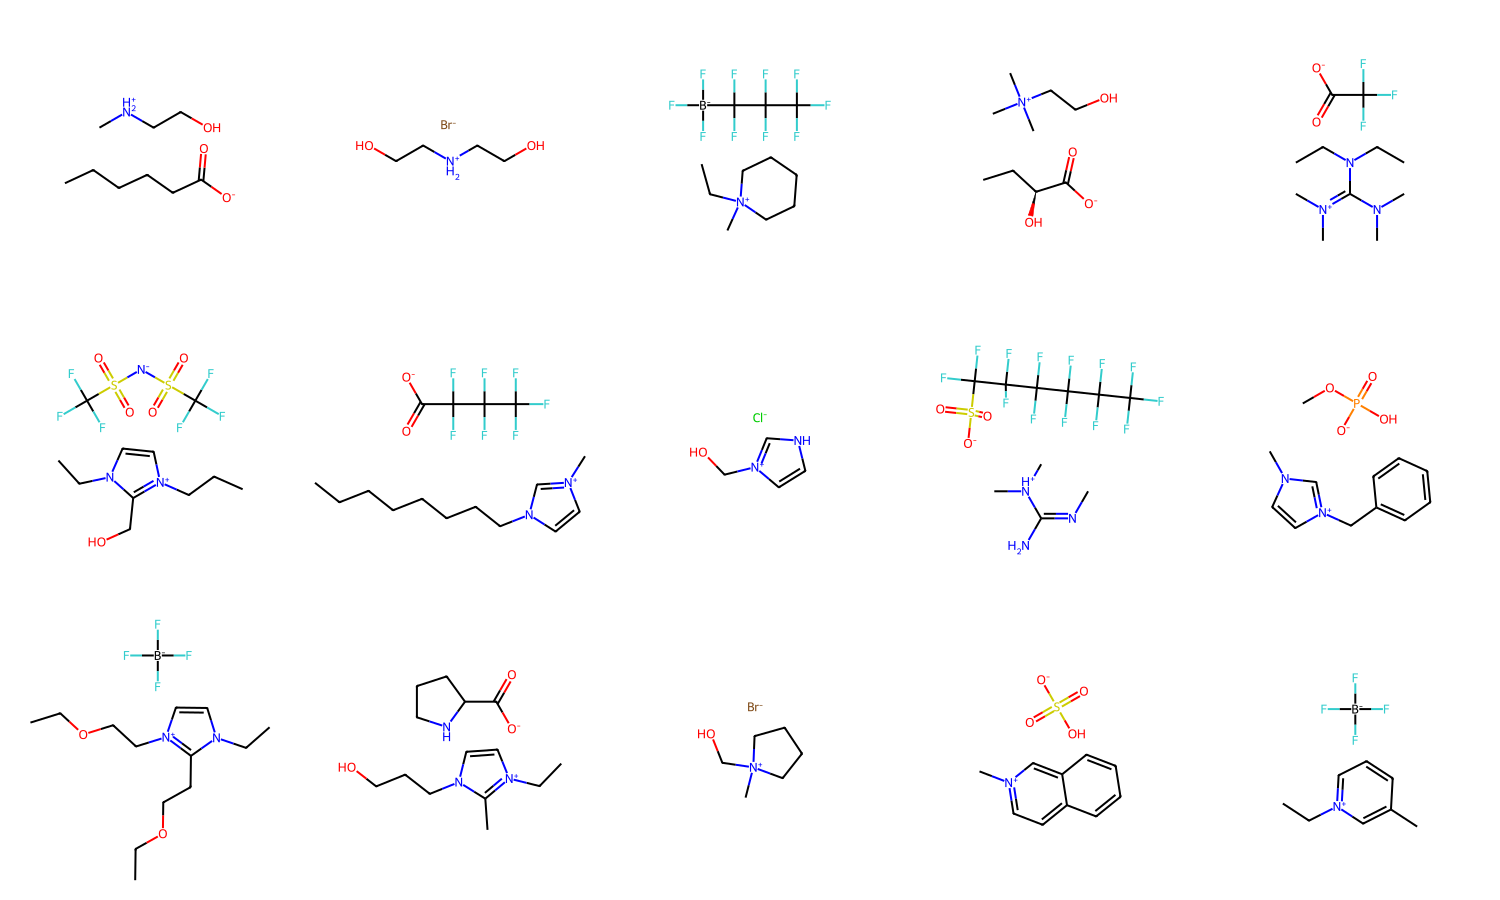

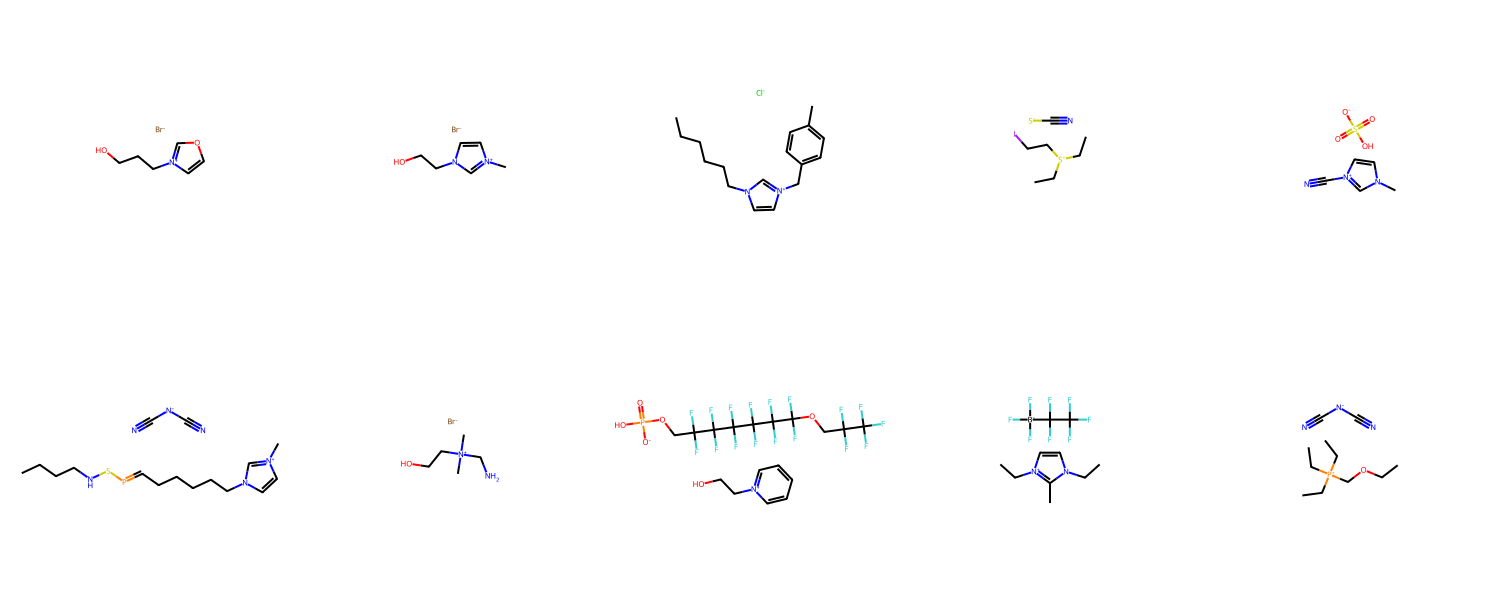

In [11]:
# Visualize the generated ionic liquids

from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

# Create RDKit molecule objects
smiles_list = non_radical_df['can_smiles']
mol_top = [Chem.MolFromSmiles(smiles) for smiles in smiles_list[:15]]
mol_bottom = [Chem.MolFromSmiles(smiles) for smiles in smiles_list[-10:]]

# Draw the molecules
img1 = Draw.MolsToGridImage(mol_top, molsPerRow=5, subImgSize=(300,300))
img2 = Draw.MolsToGridImage(mol_bottom, molsPerRow=5, subImgSize=(300,300))
display(img1, img2)

Understanding the diversity of the generated ionic liquids

In [12]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import umap
import matplotlib.pyplot as plt

/home/adroit/miniconda3/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
# Function to convert SMILES to fingerprints
def smiles_to_fingerprints(smiles_list):
    mols = [Chem.MolFromSmiles(smile) for smile in smiles_list]
    fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) for mol in mols]
    return fingerprints

# Function to calculate pairwise Tanimoto similarities
def calculate_pairwise_tanimoto(fingerprints):
    num_fps = len(fingerprints)
    similarities = []
    for i in range(num_fps):
        for j in range(i+1, num_fps):
            similarity = DataStructs.TanimotoSimilarity(fingerprints[i], fingerprints[j])
            similarities.append(similarity)
    return similarities

# Function to plot Tanimoto similarity histogram
def plot_tanimoto_histogram(similarities, title):
    plt.figure(figsize=(10, 6))
    plt.hist(similarities, bins=50, alpha=0.75)
    plt.title(title)
    plt.xlabel('Tanimoto Similarity')
    plt.ylabel('Frequency')
    plt.show()

# Function to plot UMAP projection
def plot_umap_projection(embeddings, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], s=5)
    plt.title(title)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.show()

In [14]:
# Load datasets
df1 = pd.read_csv('training_canmols.csv')
df2 = pd.read_csv('generated_canmols.csv')

# Convert SMILES to fingerprints
fps1 = smiles_to_fingerprints(df1['can_smiles'])
fps2 = smiles_to_fingerprints(df2['can_smiles'])

# Calculate pairwise Tanimoto similarities
similarities1 = calculate_pairwise_tanimoto(fps1)
similarities2 = calculate_pairwise_tanimoto(fps2)

In [25]:
# Function to plot and save combined normalized Tanimoto similarity histogram
def plot_and_save_combined_tanimoto_histogram(similarities1, similarities2, filename, dpi=500, font_size=12):
    plt.figure(figsize=(5, 5))
    plt.hist(similarities1, bins=50, alpha=0.5, color='black', label='Training ILs', density=True)
    plt.hist(similarities2, bins=50, alpha=0.5, color='green', label='Generated ILs', density=True)
    plt.xlabel('Tanimoto Similarity', fontsize=16)
    plt.ylabel('Normalized Frequency', fontsize=16)
    plt.legend(fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.savefig(filename, dpi=dpi, format='jpg', bbox_inches='tight')
    plt.show()


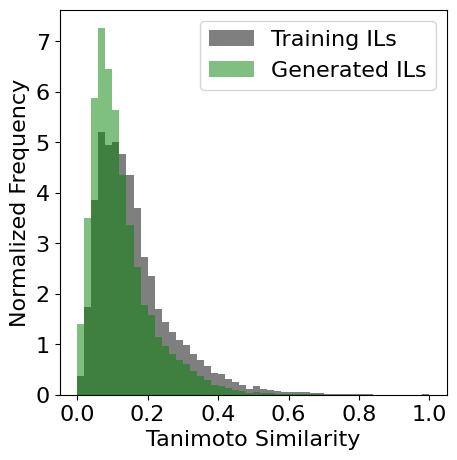

In [26]:
# Plot combined Tanimoto similarity histogram
plot_and_save_combined_tanimoto_histogram(similarities1, similarities2, "tanimoto.jpg")

In [18]:
# Calculate average pairwise Tanimoto similarities
average_similarity1 = np.mean(similarities1)
average_similarity2 = np.mean(similarities2)

print(f"Average pairwise Tanimoto similarity for Dataset 1: {average_similarity1:.4f}")
print(f"Average pairwise Tanimoto similarity for Dataset 2: {average_similarity2:.4f}")

Average pairwise Tanimoto similarity for Dataset 1: 0.1626
Average pairwise Tanimoto similarity for Dataset 2: 0.1237


In [19]:
# Assuming fps1 and fps2 are lists of fingerprints (lists or arrays of integers)
combined_fps = fps1 + fps2

# Ensure fingerprints are converted to boolean numpy arrays
fps_array = np.array([np.array(fps, dtype=bool) for fps in combined_fps])

# Perform UMAP dimensionality reduction
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='jaccard')
embeddings = reducer.fit_transform(fps_array)

/home/adroit/miniconda3/envs/torch/lib/python3.10/site-packages/umap/umap_.py:1880: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


In [37]:
# Function to plot and save UMAP projection with differentiated colors, transparency, and unfilled markers
def plot_and_save_umap_projection_combined(embeddings, len_fps1, filename, dpi=500, font_size=16):
    plt.figure(figsize=(5, 5))
    plt.scatter(embeddings[len_fps1:, 0], embeddings[len_fps1:, 1], s=30, marker='o', edgecolors='green', facecolors='none', alpha=0.5, label='Generated ILs')
    plt.scatter(embeddings[:len_fps1, 0], embeddings[:len_fps1, 1], s=10, marker='o', edgecolors='none', facecolors='black', alpha=0.5, label='Training ILs')
    plt.xlabel('UMAP1', fontsize=font_size)
    plt.ylabel('UMAP2', fontsize=font_size)
    #plt.legend(loc='upper left', frameon=True, fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.savefig(filename, dpi=dpi, format='jpg', bbox_inches='tight')
    plt.show()


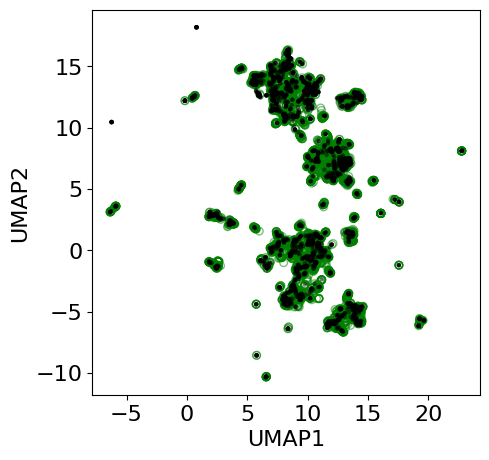

In [38]:
# Show and save
plot_and_save_umap_projection_combined(embeddings, len(fps1), "umap.jpg")